In [59]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
import os
import librosa as lr
import librosa.display
import IPython.display as ipd


In [2]:
fagote, sr = lr.load('C:/Users/gonca/OneDrive/Área de Trabalho/Graduação/Lacustamm/fagote/sol_1_fagote.wav')
fagote.size

194112

In [3]:
FRAME_SIZE = 2048
HOP_SIZE = 512
S_f = lr.stft(fagote, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

type(S_f[0][0])


numpy.complex64

In [4]:
S_f.shape

(1025, 380)

In [21]:
fagote_ft = np.fft.fft(fagote)
fagote_ft.shape

(194112,)

In [26]:
fagote_ft[0]


(-1.373778131720428+0j)

In [27]:
magnetude_spectrum_ft = np.abs(fagote_ft)

In [28]:
magnetude_spectrum_ft[0]

1.373778131720428

In [5]:
Y_scale = np.abs(S_f)**2
Y_scale.shape

(1025, 380)

In [6]:
type(Y_scale[0][0])

numpy.float32

In [7]:
#GRÁFICOS

In [67]:
def plot_magnitude_spectrum(signal, title, sr, f_ratio=1):
      ft = np.fft.fft(signal)
      magnitude_spectrum = np.abs(ft)

      #ploting the magnitude spectrum
      plt.figure(figsize=(12.5,5))
      frequency = np.linspace(0, sr, len(magnitude_spectrum))
      num_frequency_bins = int(len(frequency)*f_ratio)
      plt.plot(frequency[:num_frequency_bins], magnitude_spectrum[:num_frequency_bins])
      plt.xlabel('Frequência (Hz)')
      #first harmonic frequency
      plt.axvline(x=98, ymin=1, ymax=0, color='r',linestyle='-',label='G1')
      plt.legend(bbox_to_anchor = (0.8,1), loc='lower center')
      plt.title('Espectro Fagote')
      plt.show()

In [ ]:
plot_magnitude_spectrum(fagote, "Fagote", sr, 0.021)

In [8]:
#ESPECTROGRAMAS
def plot_spectrogram(Y, sr, hop_length, y_axis='linear'):
    plt.figure(figsize=(12.5,5))
    librosa.display.specshow(Y,
                          sr=sr,
                          hop_length=hop_length,
                          x_axis="time",
                          y_axis=y_axis)
    plt.colorbar(format="%+2.f")                          


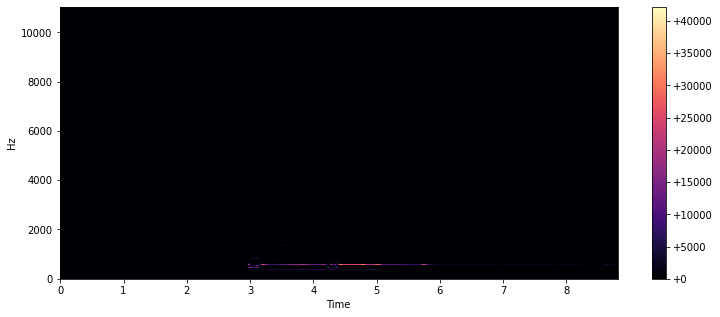

In [9]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

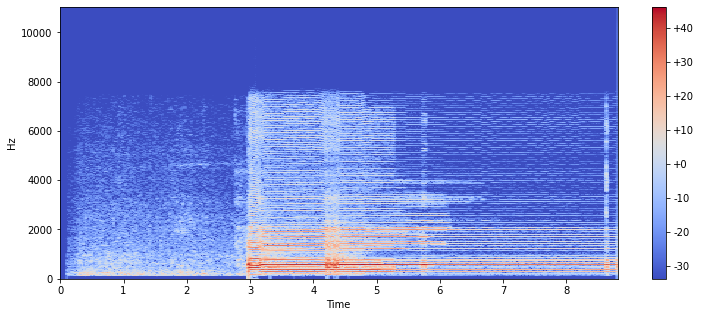

In [10]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

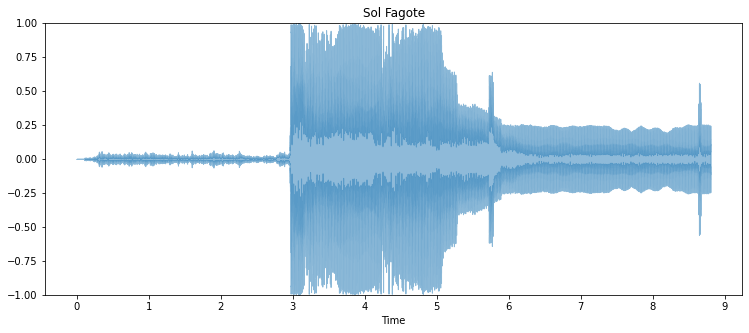

In [11]:
#WAVEFORM
plt.figure(figsize=(12.5,5))
librosa.display.waveshow(fagote, alpha=0.5)
plt.title('Sol Fagote')
plt.ylim((-1,1))
plt.show()


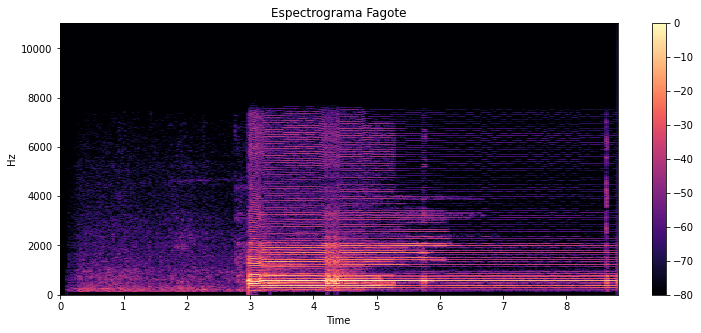

In [12]:
def to_decibles(fagote):
    # Perform short time Fourier Transformation of signal and take absolute value of results
    stft = np.abs(librosa.stft(fagote))
    # Convert to dB
    D = librosa.amplitude_to_db(stft, ref = np.max) # Set reference value to the maximum value of stft.
    return D # Return converted audio signal

# Function to plot the converted audio signal
def plot_spec(D, sr, instrument):
    fig, ax = plt.subplots(figsize = (12.5,5))
    spec = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title = 'Espectrograma ' + instrument)
    fig.colorbar(spec)

plot_spec(to_decibles(fagote), sr, 'Fagote')  

In [13]:
def env_mask(wav, threshold):
    # Absolute value
    wav = np.abs(wav)
    # Point wise mask determination.
    mask = wav > threshold
    return wav[mask]

C:\Users\gonca\AppData\Local\Temp\ipykernel_18268\504964895.py:2: FutureWarning: Pass y=[0.00530131 0.00512408 0.00600478 ... 0.05103406 0.05529679 0.06715312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  ft_spec = lr.feature.melspectrogram(ft_mel)


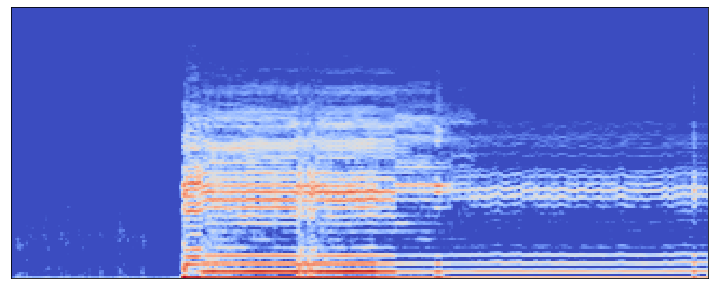

In [14]:
ft_mel = env_mask(fagote, 0.005)
ft_spec = lr.feature.melspectrogram(ft_mel)
g = lr.amplitude_to_db(ft_spec)
plt.figure(figsize=(12.5,5))
lr.display.specshow(g)